In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
baseload = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad3.csv', header=None)
# Rename columns to start numbering at 1
baseload.columns = range(1, baseload.shape[1] + 1)

# Adjust the index to start at 1
baseload.index = range(1, len(baseload) + 1)

In [3]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)

# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)

# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)

# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

In [4]:
kwp = 1
base_and_solar = baseload - (kwp * solargen)

Statistical moment 1: Mean

Year

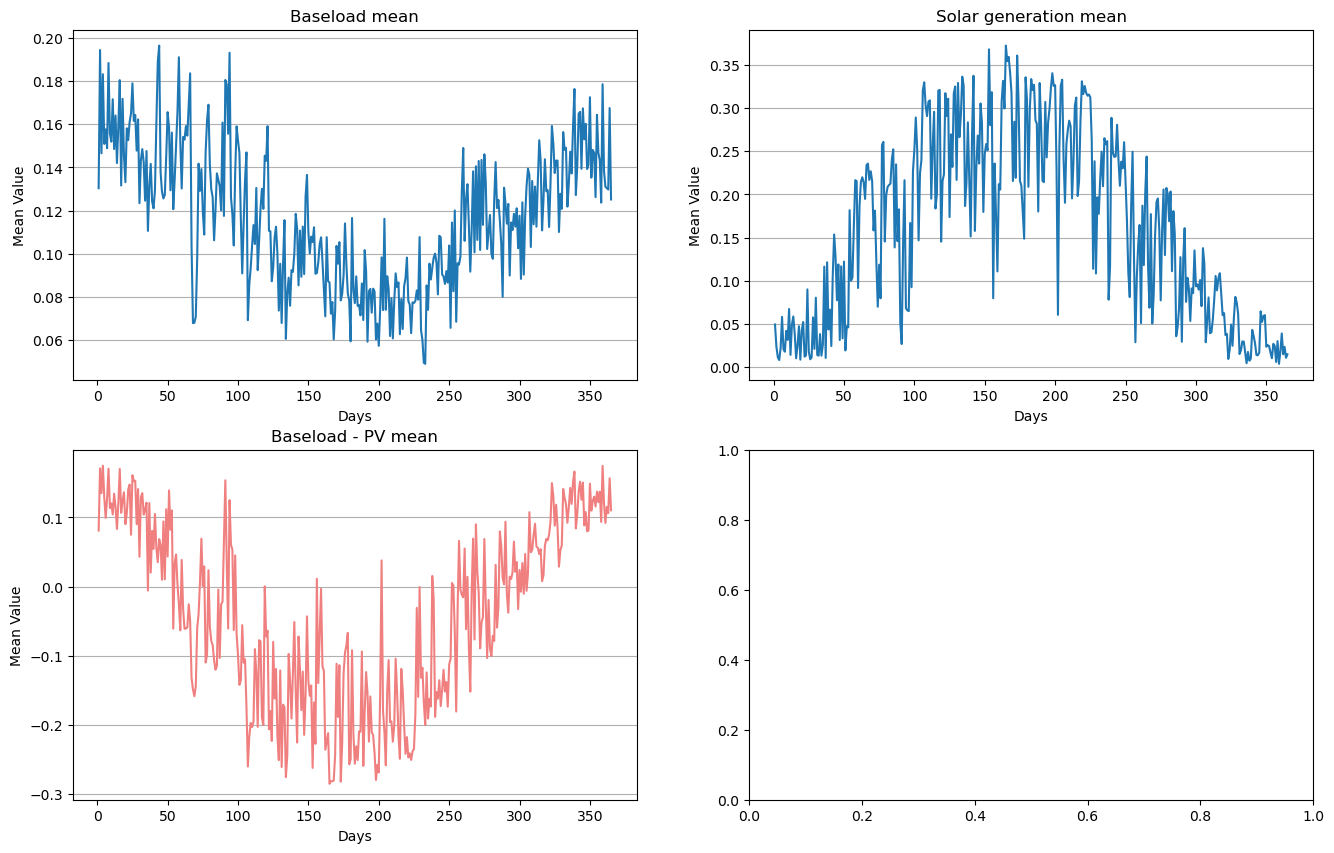

In [5]:
baseload_mean_year = baseload.mean(axis=0)
solargen_mean_year = solargen.mean(axis=0)
baseandPV_mean_year = base_and_solar.mean(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_year.index, baseload_mean_year)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_mean_year.index, solargen_mean_year)
axs[0,1].set_title('Solar generation mean')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_mean_year.index, baseandPV_mean_year, color='lightcoral')
axs[1,0].set_title('Baseload - PV mean')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Mean Value')
axs[1,0].grid(axis='y')

Day

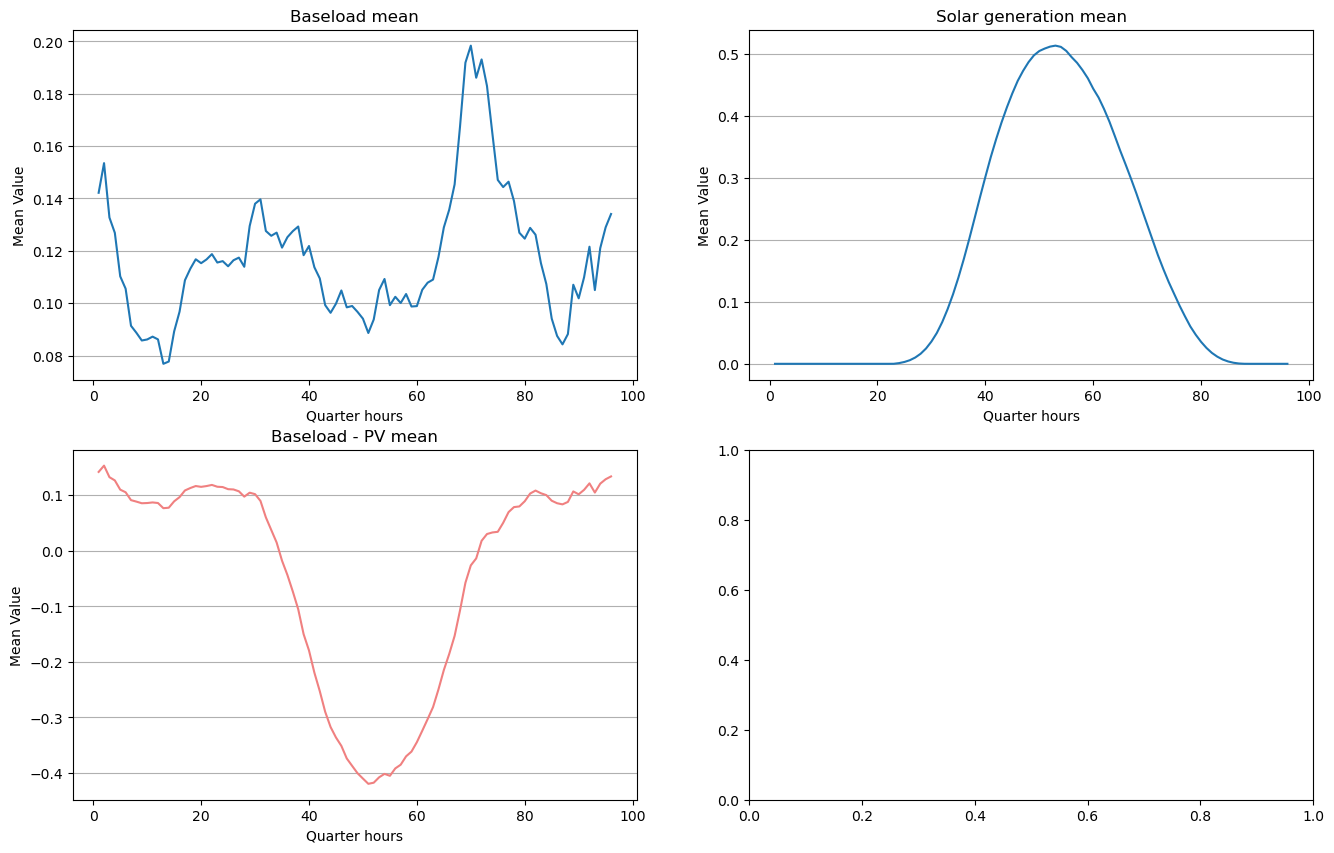

In [6]:
baseload_mean_day = baseload.mean(axis=1)
solargen_mean_day = solargen.mean(axis=1)
baseandPV_mean_day = base_and_solar.mean(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_day.index, baseload_mean_day)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_mean_day.index, solargen_mean_day)
axs[0,1].set_title('Solar generation mean')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_mean_day.index, baseandPV_mean_day, color='lightcoral')
axs[1,0].set_title('Baseload - PV mean')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Mean Value')
axs[1,0].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

In [7]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

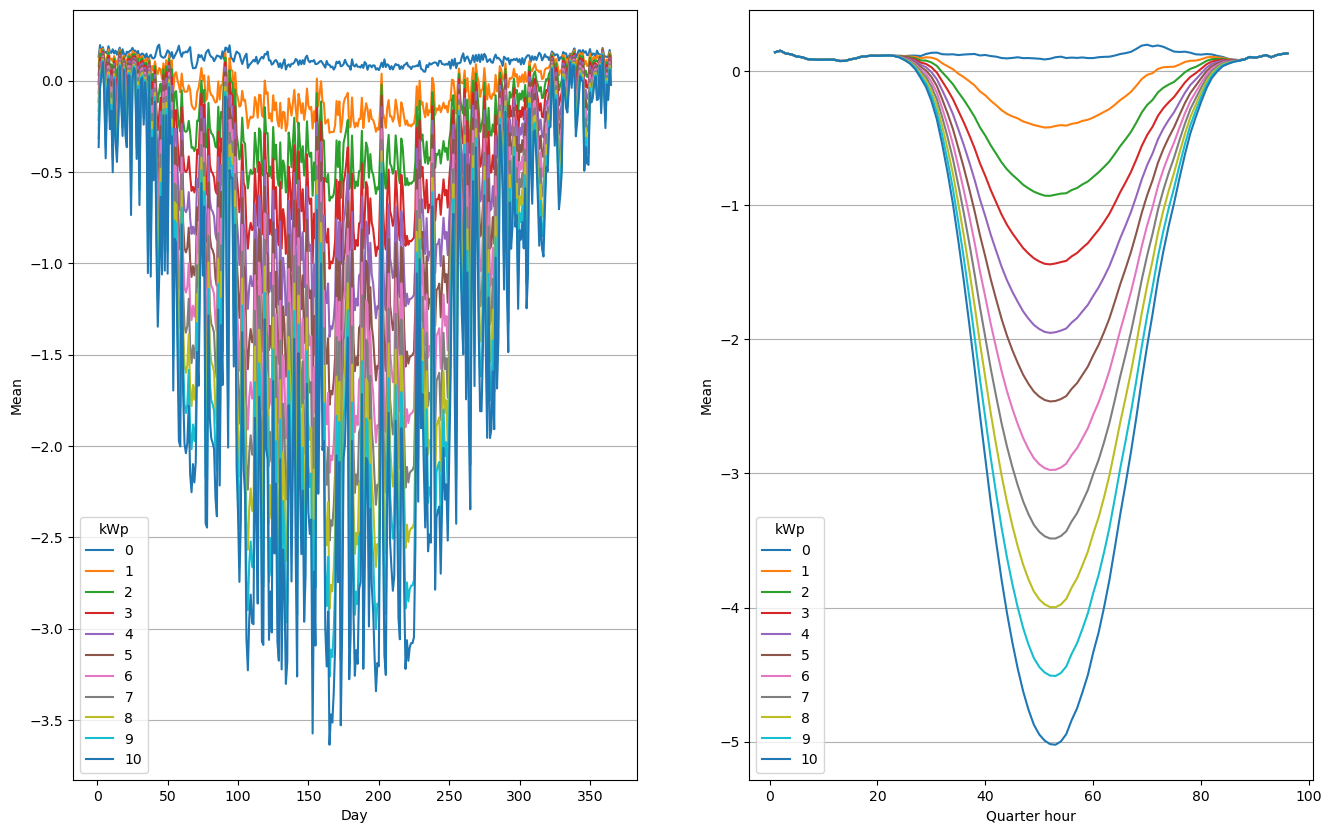

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and mean for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_mean = net_consumption.mean(axis=0)
    net_consumption_day_mean = net_consumption.mean(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_mean
    results_day[len(results_day.columns)] = net_consumption_day_mean

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Mean')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Mean')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 2: Variance

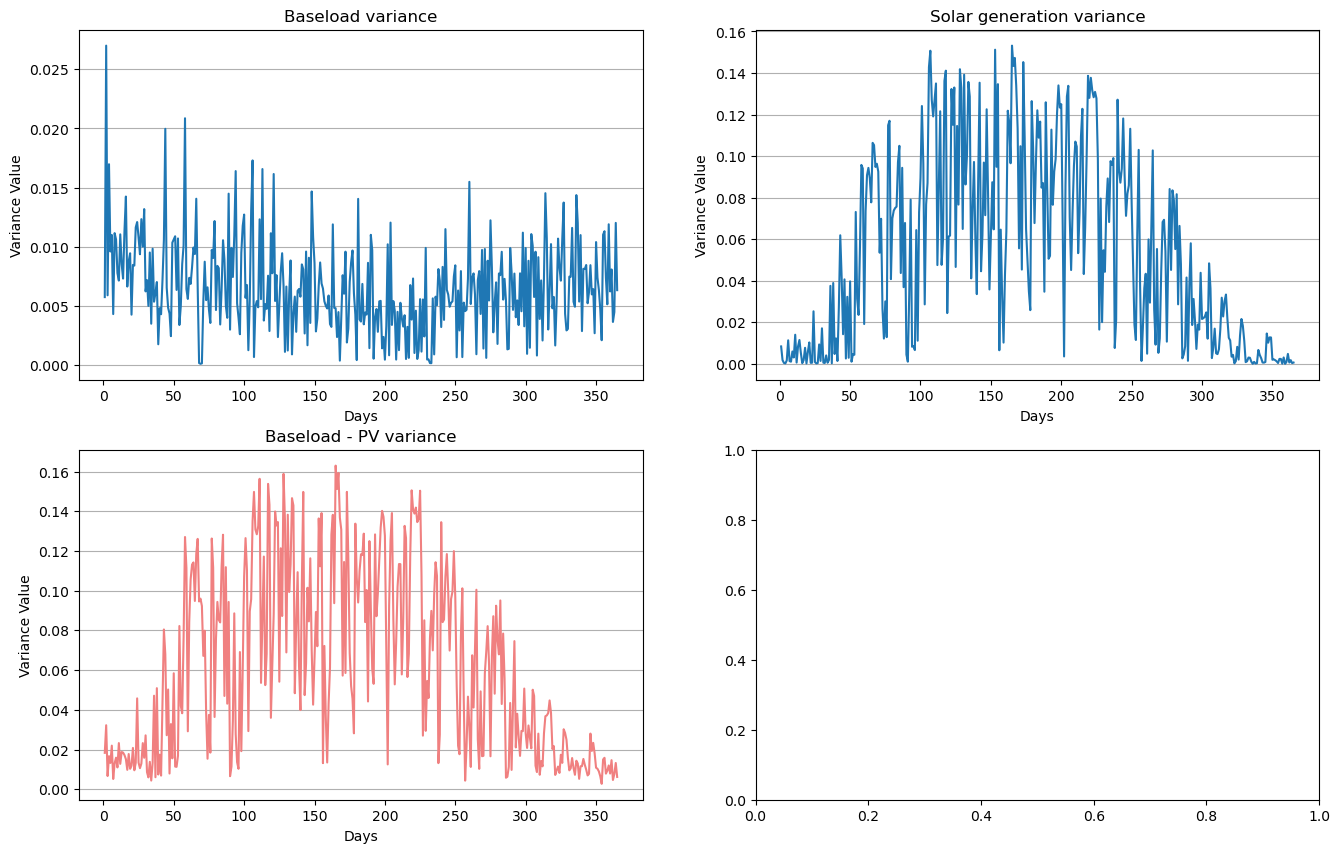

In [9]:
baseload_var_year = baseload.var(axis=0)
solargen_var_year = solargen.var(axis=0)
baseandPV_var_year = base_and_solar.var(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_year.index, baseload_var_year)
axs[0,0].set_title('Baseload variance')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Variance Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var_year.index, solargen_var_year)
axs[0,1].set_title('Solar generation variance')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Variance Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_var_year.index, baseandPV_var_year, color='lightcoral')
axs[1,0].set_title('Baseload - PV variance')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Variance Value')
axs[1,0].grid(axis='y')


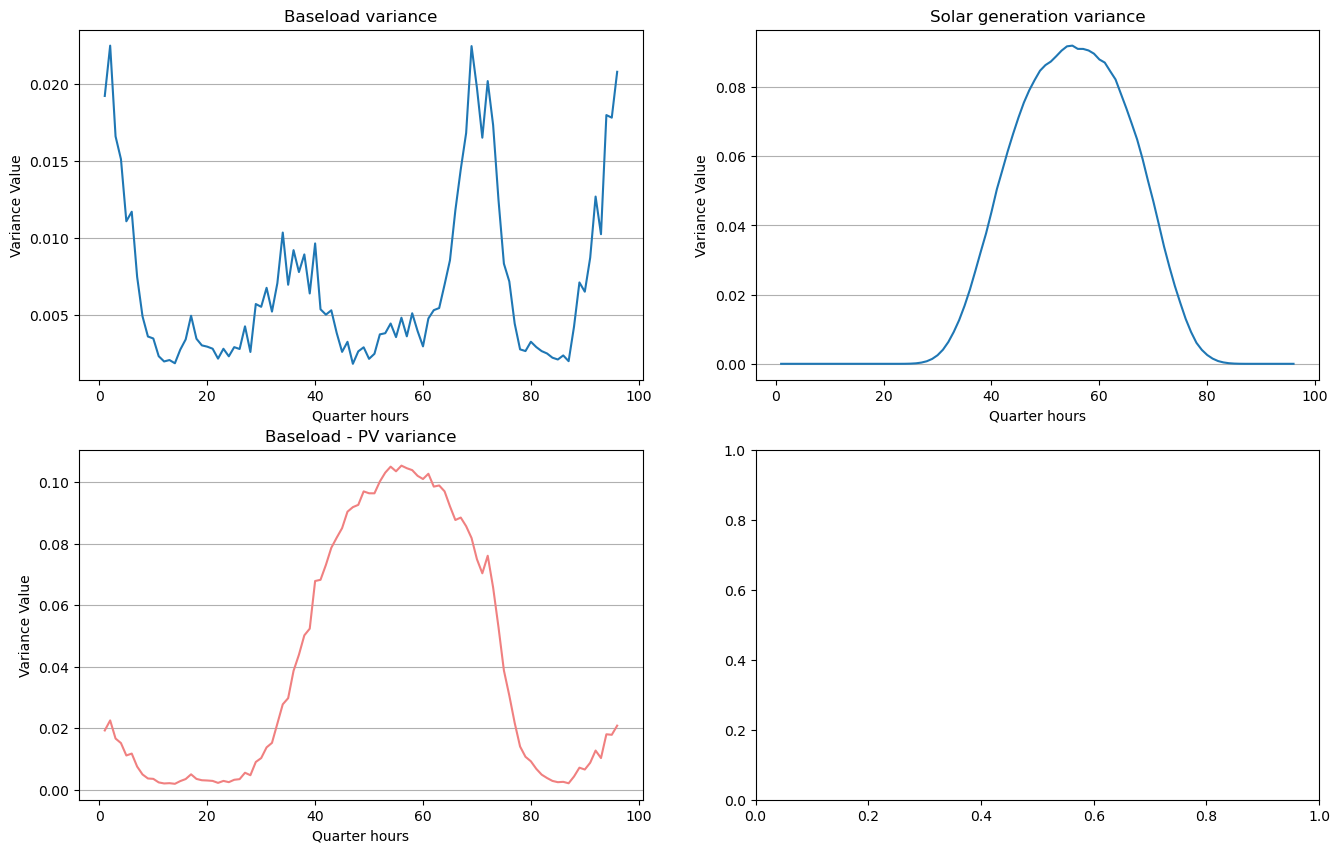

In [10]:
baseload_var_day = baseload.var(axis=1)
solargen_var_day = solargen.var(axis=1)
baseandPV_var_day = base_and_solar.var(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_day.index, baseload_var_day)
axs[0,0].set_title('Baseload variance')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Variance Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var_day.index, solargen_var_day)
axs[0,1].set_title('Solar generation variance')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Variance Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_var_day.index, baseandPV_var_day, color='lightcoral')
axs[1,0].set_title('Baseload - PV variance')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Variance Value')
axs[1,0].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

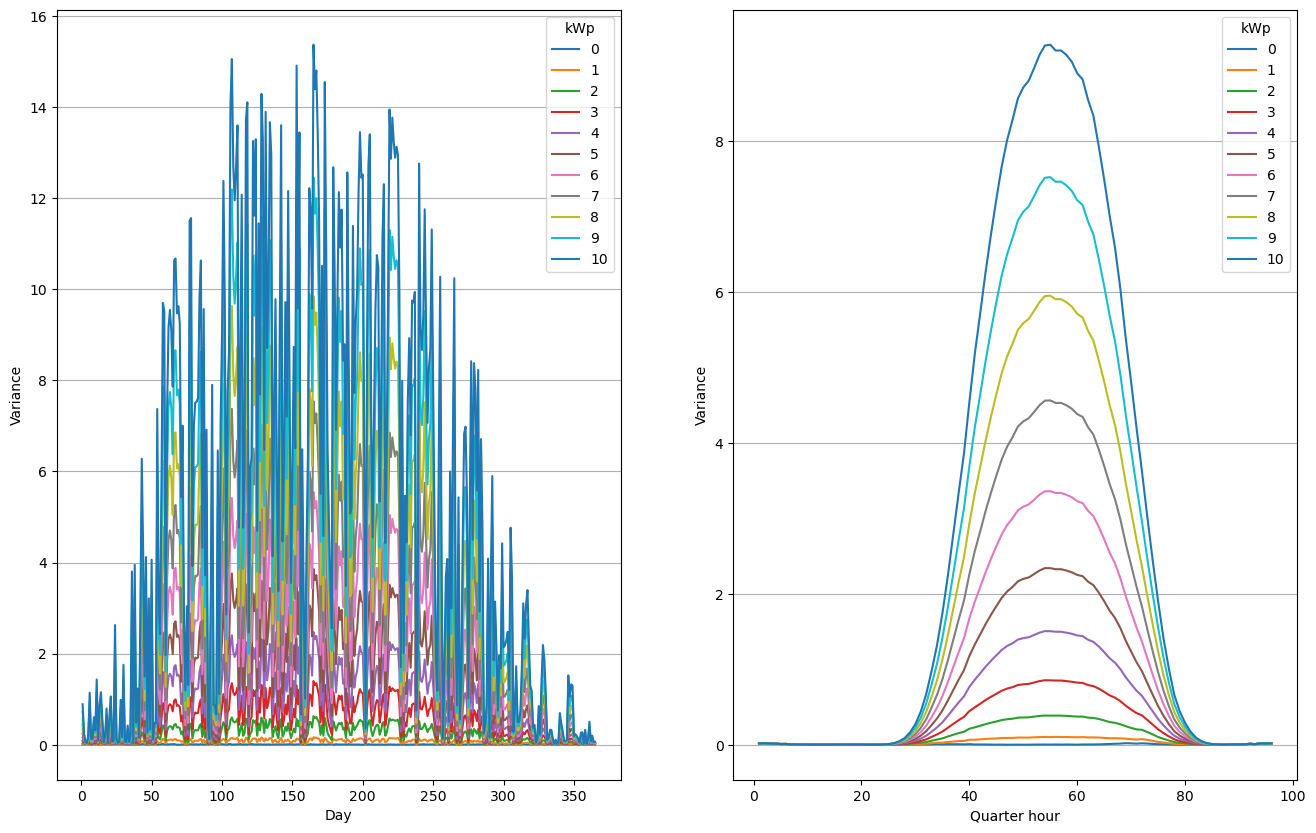

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and variance for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_var = net_consumption.var(axis=0)
    net_consumption_day_var = net_consumption.var(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_var
    results_day[len(results_day.columns)] = net_consumption_day_var

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Variance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Variance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 3: Skewness

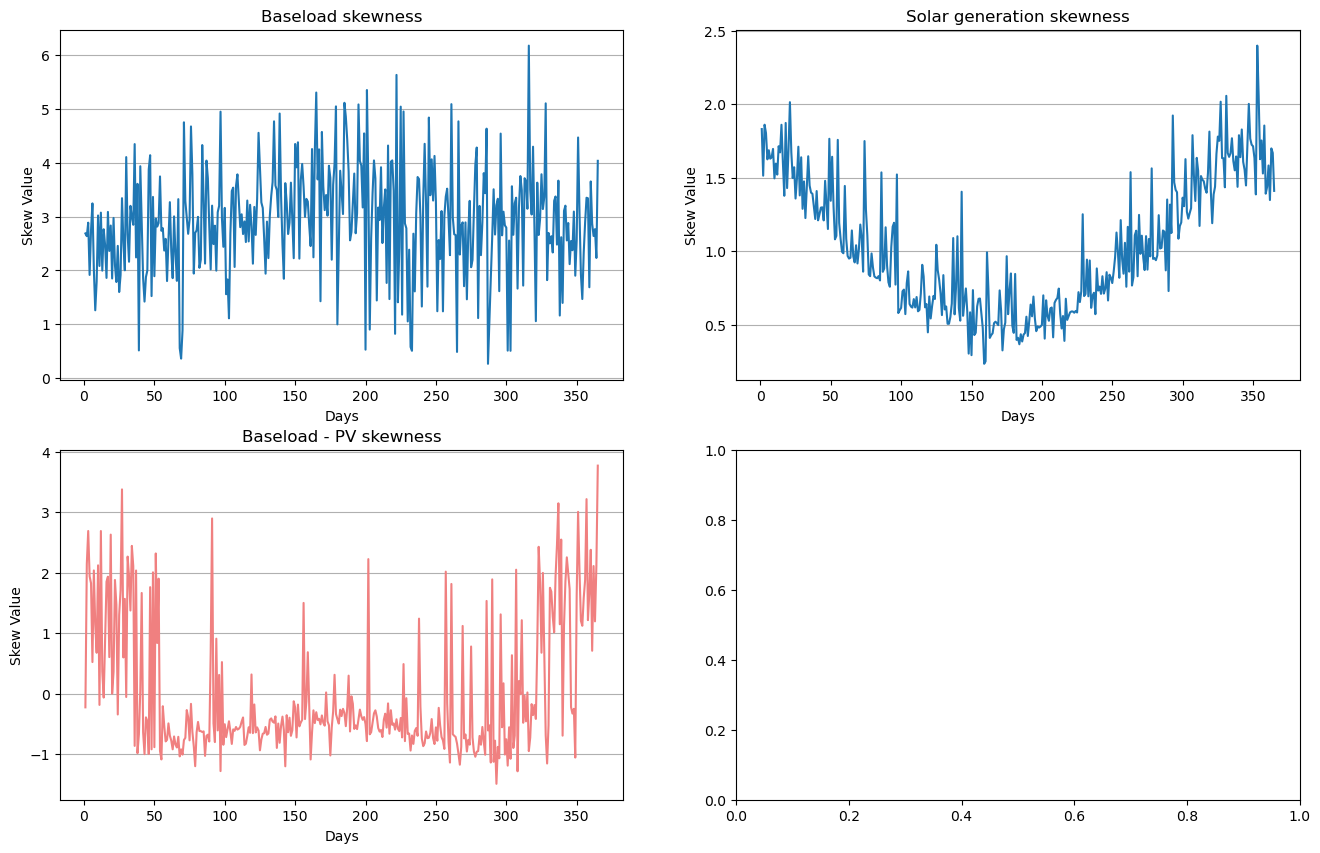

In [12]:
baseload_skew_year = baseload.skew(axis=0)
solargen_skew_year = solargen.skew(axis=0)
baseandPV_skew_year = base_and_solar.skew(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_year.index, baseload_skew_year)
axs[0,0].set_title('Baseload skewness')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_skew_year.index, solargen_skew_year)
axs[0,1].set_title('Solar generation skewness')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Skew Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_skew_year.index, baseandPV_skew_year, color='lightcoral')
axs[1,0].set_title('Baseload - PV skewness')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Skew Value')
axs[1,0].grid(axis='y')

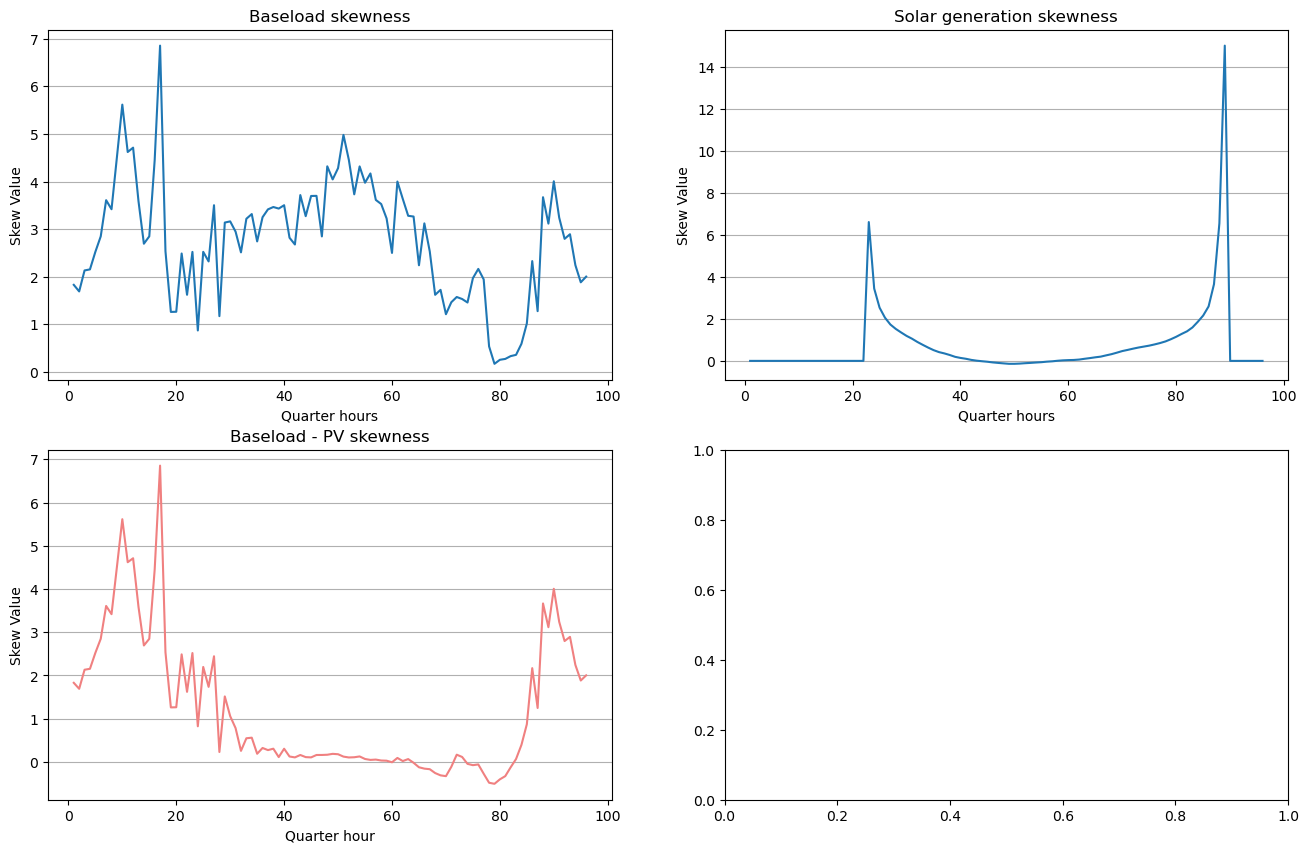

In [13]:
baseload_skew_day = baseload.skew(axis=1)
solargen_skew_day = solargen.skew(axis=1)
baseandPV_skew_day = base_and_solar.skew(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_day.index, baseload_skew_day)
axs[0,0].set_title('Baseload skewness')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_skew_day.index, solargen_skew_day)
axs[0,1].set_title('Solar generation skewness')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Skew Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_skew_day.index, baseandPV_skew_day, color='lightcoral')
axs[1,0].set_title('Baseload - PV skewness')
axs[1,0].set_xlabel('Quarter hour')
axs[1,0].set_ylabel('Skew Value')
axs[1,0].grid(axis='y')

kWp sensitivity
(Gradually increase kWp)

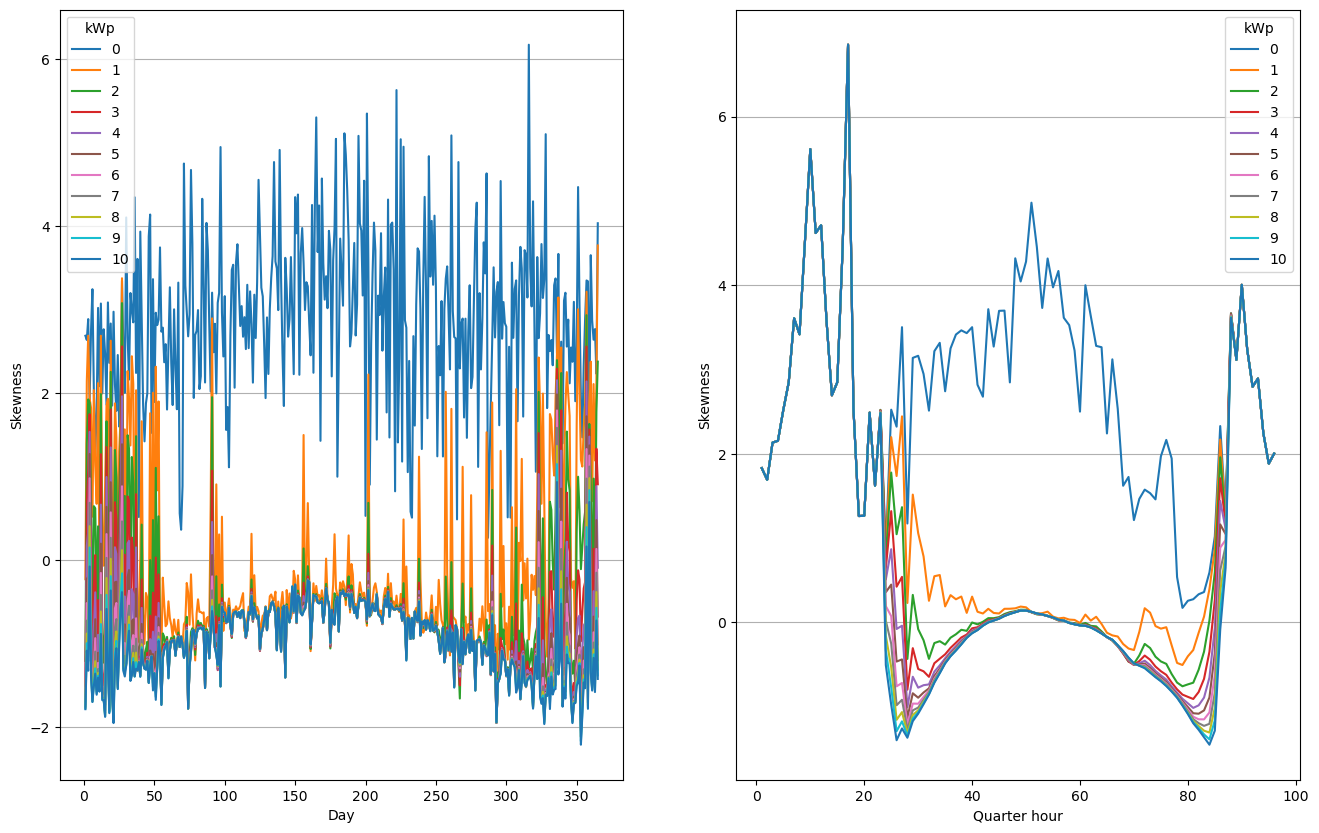

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and skewness for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_skew = net_consumption.skew(axis=0)
    net_consumption_day_skew = net_consumption.skew(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_skew
    results_day[len(results_day.columns)] = net_consumption_day_skew

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Skewness')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Skewness')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 4: Kurtosis

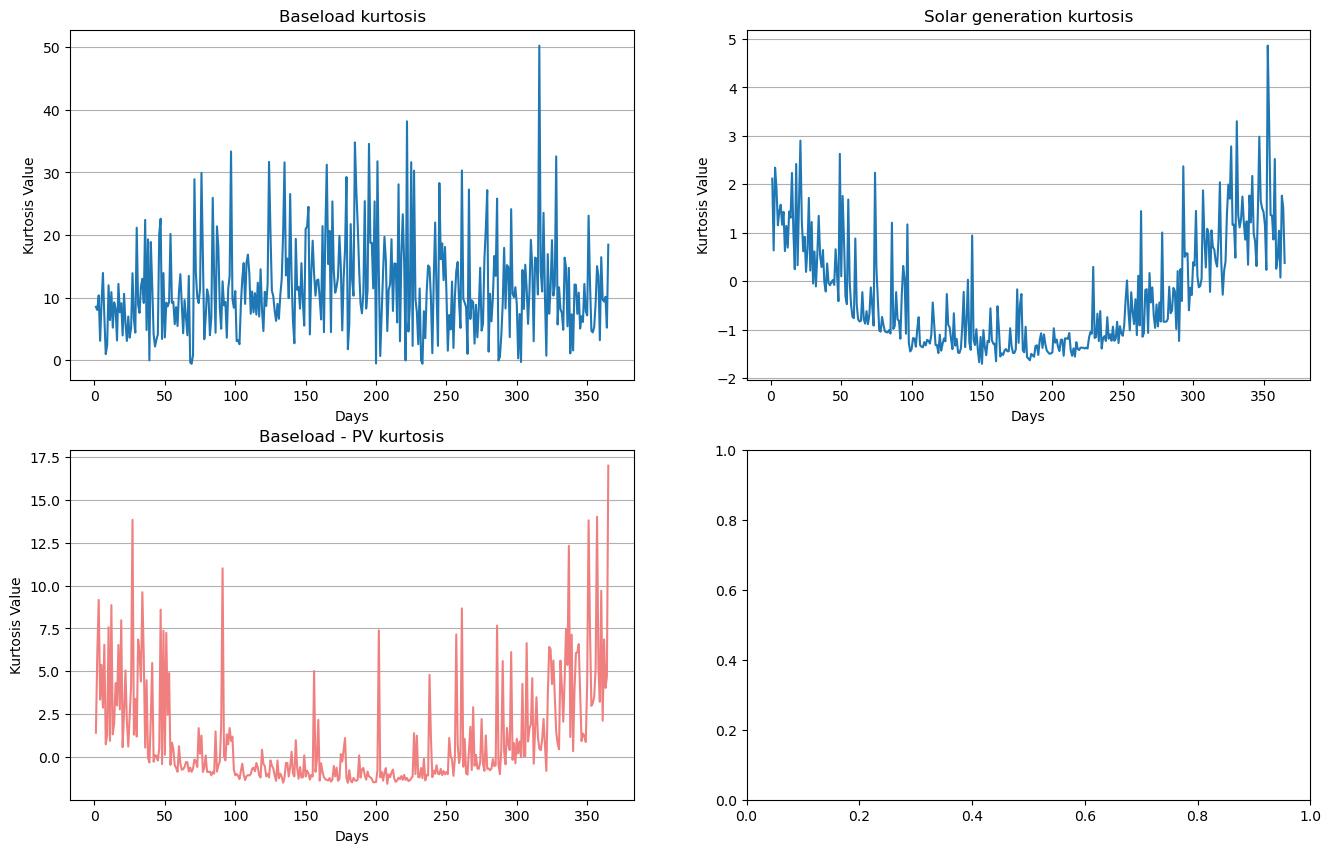

In [15]:
baseload_kurt_year = baseload.kurt(axis=0)
solargen_kurt_year = solargen.kurt(axis=0)
baseandPV_kurt_year = base_and_solar.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_year.index, baseload_kurt_year)
axs[0,0].set_title('Baseload kurtosis')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Kurtosis Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_kurt_year.index, solargen_kurt_year)
axs[0,1].set_title('Solar generation kurtosis')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Kurtosis Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_kurt_year.index, baseandPV_kurt_year, color='lightcoral')
axs[1,0].set_title('Baseload - PV kurtosis')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Kurtosis Value')
axs[1,0].grid(axis='y')

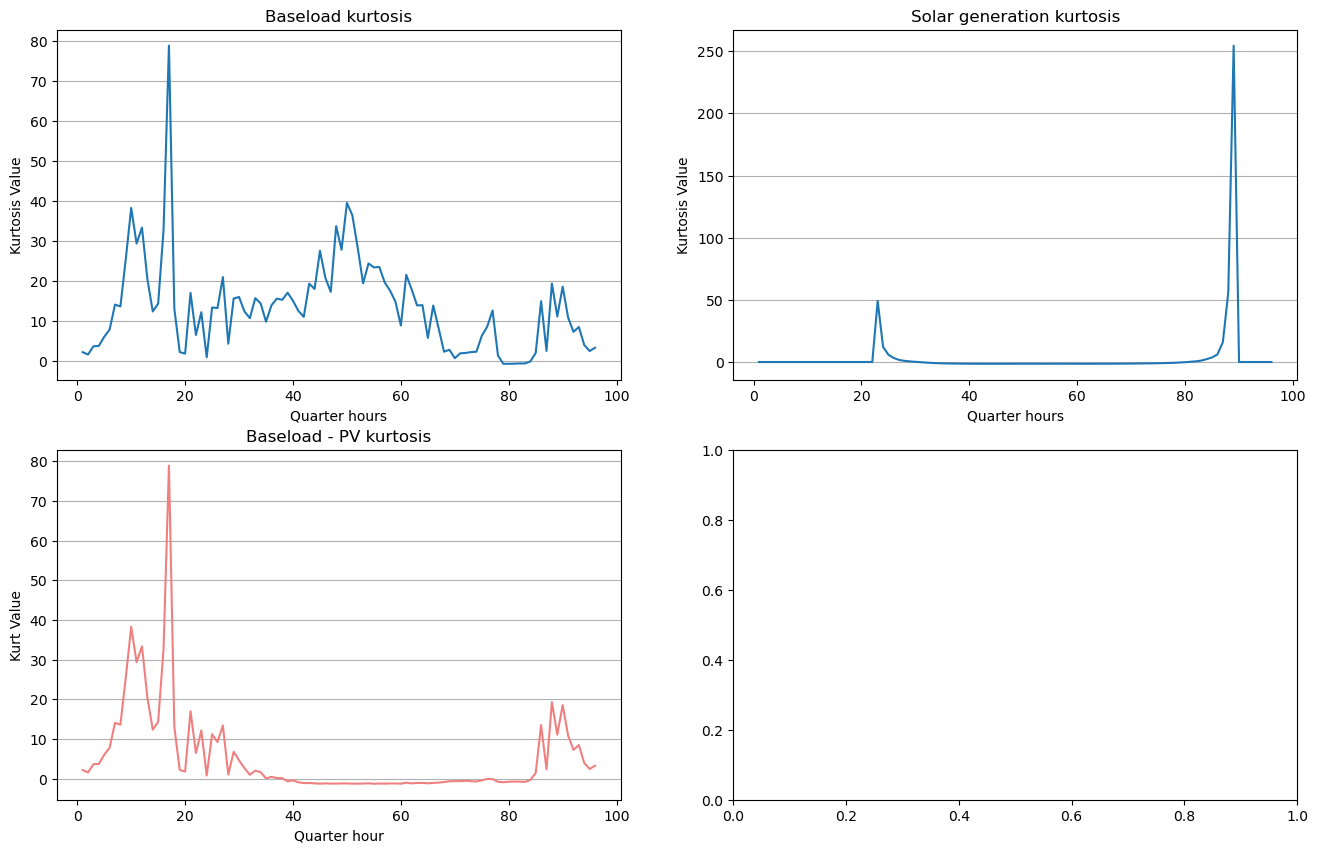

In [16]:
baseload_kurt_day = baseload.kurt(axis=1)
solargen_kurt_day = solargen.kurt(axis=1)
baseandPV_kurt_day = base_and_solar.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_day.index, baseload_kurt_day)
axs[0,0].set_title('Baseload kurtosis')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Kurtosis Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_kurt_day.index, solargen_kurt_day)
axs[0,1].set_title('Solar generation kurtosis')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Kurtosis Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandPV_kurt_day.index, baseandPV_kurt_day, color='lightcoral')
axs[1,0].set_title('Baseload - PV kurtosis')
axs[1,0].set_xlabel('Quarter hour')
axs[1,0].set_ylabel('Kurt Value')
axs[1,0].grid(axis='y')

kWp sensitivity (Gradually increase kWp)

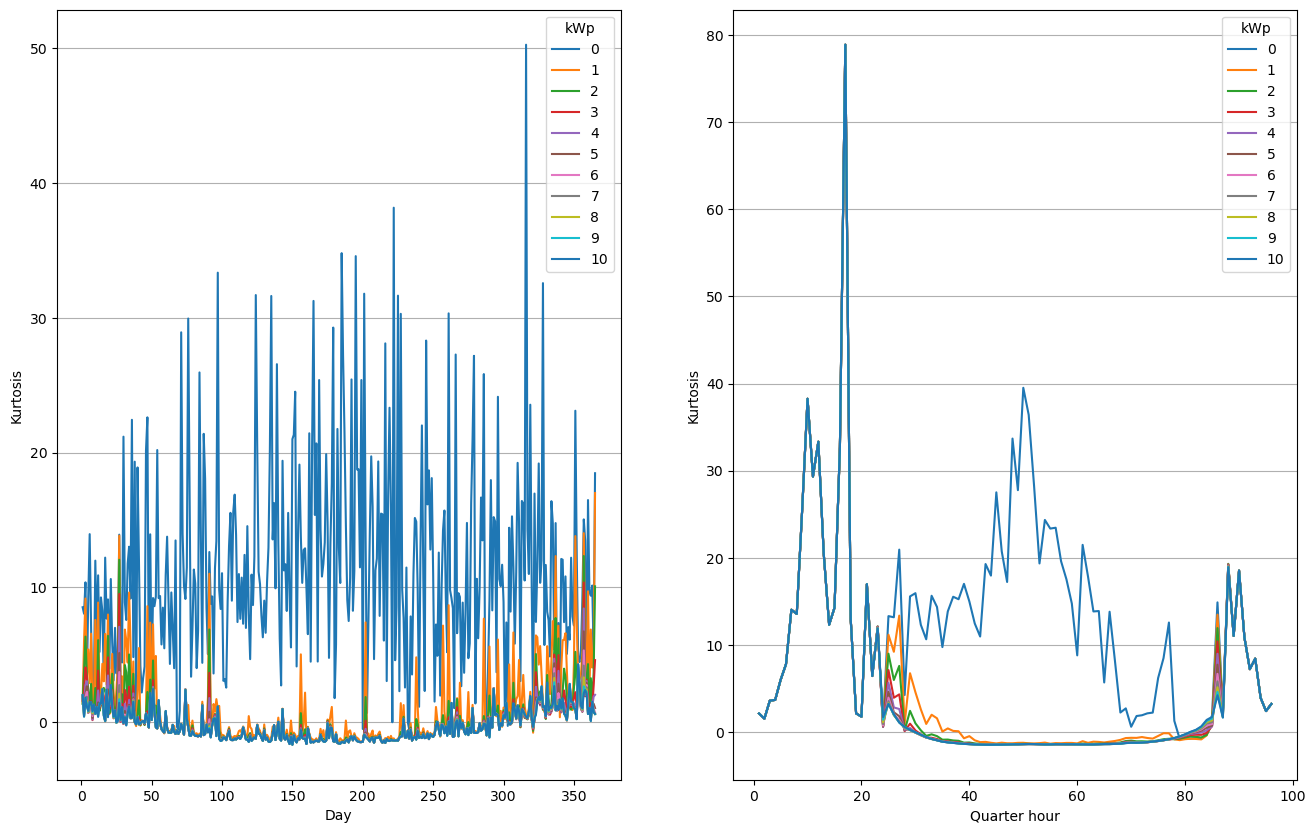

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and kurtosis for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    net_consumption_year_kurt = net_consumption.kurt(axis=0)
    net_consumption_day_kurt = net_consumption.kurt(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_kurt
    results_day[len(results_day.columns)] = net_consumption_day_kurt

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Kurtosis')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Kurtosis')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()